<a href="https://colab.research.google.com/github/ahmedabdelhameed/PyTorch/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Model 1

In [3]:
import torch
from torch.nn import Linear
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [5]:
x_data = np.array([1, 2, 3, 4, 5])
y_data = x_data * 2

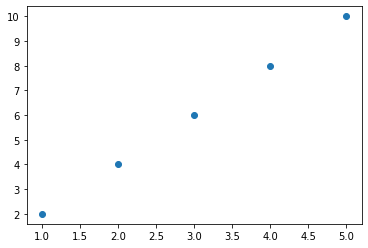

In [6]:
plt.scatter(x_data, y_data)

In [7]:
def forward(x, w, b=0):
  y_hat = x * w + b
  return y_hat

In [8]:
def loss(y_hat, y):
  return (y_hat - y) ** 2

In [9]:
all_w = []
all_loss = []

for w in np.arange(0, 4, 0.1):
  l_sum = 0

  for i in range(len(x_data)):
    y_hat = forward(x_data[i], w)
    l = loss(y_hat, y_data[i])

    l_sum += l
  
  all_w.append(w)
  all_loss.append(l_sum / len(y_data))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


<StemContainer object of 3 artists>

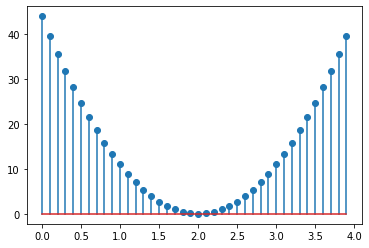

In [10]:
plt.stem(all_w, all_loss)

#Model 2

In [11]:
import torch
from torch.nn import Linear
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [12]:
x_data = np.array([1, 2, 3, 4, 5])
y_data = x_data * 2

In [13]:
x_torch = torch.Tensor(x_data).reshape(-1,1)
y_torch = torch.FloatTensor(y_data).reshape(-1,1)

In [15]:
x_torch

tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.]])

In [16]:
y_torch

tensor([[ 2.],
        [ 4.],
        [ 6.],
        [ 8.],
        [10.]])

In [19]:
w = torch.tensor(5., requires_grad=True)
b = torch.tensor(3., requires_grad=True)
lr = 0.05

In [20]:
for i in range(1000):
  y_hat = x_torch * w + b

  loss = torch.sum(torch.pow(y_torch - y_hat, 2) / len(y_torch))
  loss.backward()
  
  with torch.no_grad():
    w -= lr * w.grad
    b -= lr * b.grad

    w.grad.zero_()
    b.grad.zero_()

In [21]:
y_pred = x_torch * w + b

In [22]:
y_pred

tensor([[ 2.0000],
        [ 4.0000],
        [ 6.0000],
        [ 8.0000],
        [10.0000]], grad_fn=<AddBackward0>)

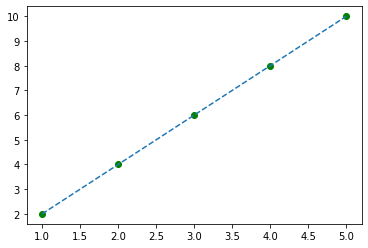

In [25]:
plt.plot(x_torch, y_torch, 'go')
#Can't do plt.plot(x_torch, y_pred, '--')
#Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.
plt.plot(x_torch, y_pred.detach().numpy(), '--')

In [26]:
w, b

(tensor(2.0000, requires_grad=True), tensor(7.2257e-07, requires_grad=True))

# Model3

In [1]:
import torch
from torch.nn import Linear
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x = np.random.rand(50)
x = x * 10
y = x * 3 - 4
y += np.random.randn(50)

In [10]:
class LinearModel(nn.Module):
  def __init__(self):
    super(LinearModel,self).__init__()
    self.linear = nn.Linear(1,1)

  def forward(self, x):
    return self.linear(x)

In [11]:
x_torch = torch.FloatTensor(x).reshape(-1,1)
y_torch = torch.FloatTensor(y).reshape(-1, 1)

In [13]:
model = LinearModel()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [15]:
all_loss = []
for epoch in range(100):
  y_hat = model(x_torch)
  loss = criterion(y_hat, y_torch)
  loss.backward()

  all_loss.append(loss.item())

  optimizer.step()
  optimizer.zero_grad()

In [16]:
y_pred = model.forward(x_torch)

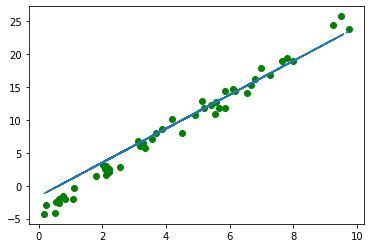

In [17]:
plt.plot(x_torch, y_torch, 'go')
plt.plot(x_torch, y_pred.detach().numpy(), '--')

In [18]:
for name, param in model.named_parameters():
  print(name,param)

linear.weight Parameter containing:
tensor([[2.5748]], requires_grad=True)
linear.bias Parameter containing:
tensor([-1.6062], requires_grad=True)


#Model 4


In [19]:
import torch
from torch.nn import Linear
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [20]:
class LinearRegression(nn.Module):
  def __init__(self, in_features, out_features):
    super().__init__()
    self.linear = nn.Linear(in_features, out_features)

  def forward(self, x):
    prediction = self.linear(x)
    return prediction

In [21]:
torch.manual_seed(0)
model = LinearRegression(1, 1)
print (model)
print (list(model.parameters()))

LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
[Parameter containing:
tensor([[-0.0075]], requires_grad=True), Parameter containing:
tensor([0.5364], requires_grad=True)]


Text(0, 0.5, 'y')

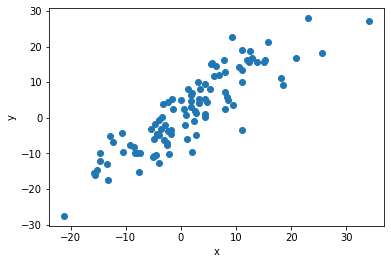

In [22]:
x = torch.randn(100, 1) * 10
y = x + 5 * torch.randn(100, 1)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')

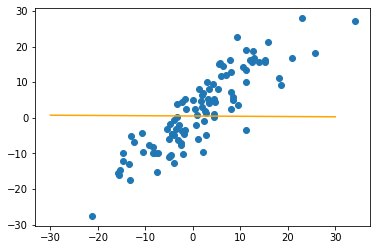

In [23]:
[w, b] = model.parameters() 

def get_parameters():
  return w[0][0].item(), b[0].item()
def plot_line():
  w1, b1 = get_parameters()
  # To plot a line, we just need two data points
  x1 = np.array([-30, 30]) 
  y1 = w1*x1 + b1
  plt.plot(x1, y1, color='orange')
  plt.scatter(x, y)
  plt.show()
plot_line()

In [24]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

epochs = 100
losses = []

for i in range(epochs):
  optimizer.zero_grad()
  output = model(x)
  loss = criterion(output, y)
  
  losses.append(loss)
  
  loss.backward()
  optimizer.step()

Text(0.5, 0, 'epoch')

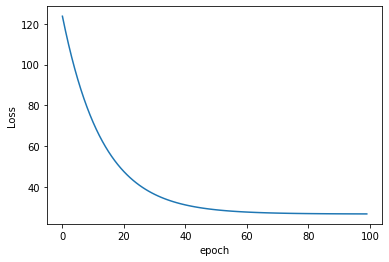

In [25]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel("epoch")

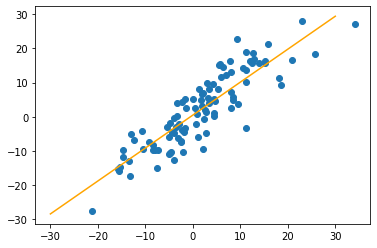

In [26]:
plot_line()

#Model 5

In [27]:
import torch
from torch.nn import Linear
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [28]:
import numpy as np# create dummy data for training
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

In [29]:
import torch
from torch.autograd import Variable

In [30]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [31]:
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 100

model = linearRegression(inputDim, outputDim)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

In [32]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [33]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(92.7809, grad_fn=<MseLossBackward>)
epoch 0, loss 92.78092956542969
tensor(8.0783, grad_fn=<MseLossBackward>)
epoch 1, loss 8.07831859588623
tensor(1.1637, grad_fn=<MseLossBackward>)
epoch 2, loss 1.1636912822723389
tensor(0.5941, grad_fn=<MseLossBackward>)
epoch 3, loss 0.5940503478050232
tensor(0.5420, grad_fn=<MseLossBackward>)
epoch 4, loss 0.542012631893158
tensor(0.5323, grad_fn=<MseLossBackward>)
epoch 5, loss 0.5322566628456116
tensor(0.5260, grad_fn=<MseLossBackward>)
epoch 6, loss 0.526011049747467
tensor(0.5201, grad_fn=<MseLossBackward>)
epoch 7, loss 0.5201122164726257
tensor(0.5143, grad_fn=<MseLossBackward>)
epoch 8, loss 0.5143018960952759
tensor(0.5086, grad_fn=<MseLossBackward>)
epoch 9, loss 0.5085587501525879
tensor(0.5029, grad_fn=<MseLossBackward>)
epoch 10, loss 0.5028800964355469
tensor(0.4973, grad_fn=<MseLossBackward>)
epoch 11, loss 0.49726441502571106
tensor(0.4917, grad_fn=<MseLossBackward>)
epoch 12, loss 0.4917116165161133
tensor(0.4862, grad_fn=<M

[[ 0.19967417]
 [ 2.3149283 ]
 [ 4.4301825 ]
 [ 6.5454364 ]
 [ 8.660691  ]
 [10.775946  ]
 [12.891199  ]
 [15.0064535 ]
 [17.121708  ]
 [19.236961  ]
 [21.352217  ]]


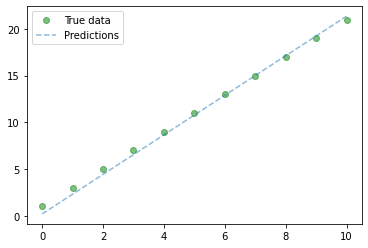

In [34]:
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()